# demo_多项式回归

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm

In [8]:
data = pd.read_csv("Salary_Data2.csv")
x, y = data.loc[:,:'YearsExperience'], data['Salary']
test_data = data.loc[:30:4]
test_x, test_y = test_data.loc[:,:'YearsExperience'], test_data['Salary']

In [9]:
model = pl.make_pipeline(
        sp.PolynomialFeatures(3),
        lm.Ridge())
model.fit(x, y)
result = model.predict(test_x)
result

array([ 38036.74280308,  49323.25176385,  57378.02048769,  62975.86632032,
        70412.43456439,  84047.06556922, 107494.36817609, 138607.62554111])

In [10]:
r2_score = sm.r2_score(test_y, result)
r2_score

0.922343706323134

# 多项式模型可视化

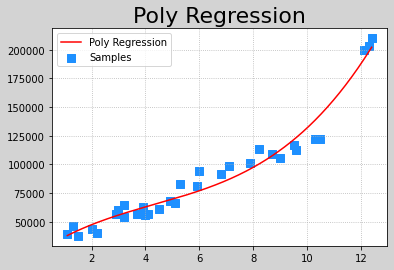

In [11]:
plt.figure('Poly Regression',facecolor = 'lightgrey')
plt.title('Poly Regression', fontsize=22)
plt.grid(linestyle = ':')
plt.scatter(x.values.ravel(), y, marker='s',s=50, label='Samples', color = 'dodgerblue')

#构造200个点，计算他们的预测结果，绘图
poly_x = np.linspace(x.min(), x.max(),200)
poly_y = model.predict(poly_x.reshape(-1, 1))
plt.plot(poly_x, poly_y, color = 'red', label = 'Poly Regression')

plt.legend()
plt.show()